## **Section04_solo project**  김민채 


## **Load Images Dataset & Preprocessing work**  


Kaggle URI ([face mask detector](https://www.kaggle.com/spandanpatnaik09/face-mask-detectormask-not-mask-incorrect-mask))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
### load skimage library
import skimage
print(skimage.__version__)

0.16.2


In [3]:
### load images 
from skimage.io import imread_collection

incorrect_mask = imread_collection('drive/MyDrive/mask/dataset/incorrect_mask/*.jpg')
with_mask = imread_collection('drive/MyDrive/mask/dataset/with_mask/*.jpg')
without_mask = imread_collection('drive/MyDrive/mask/dataset/without_mask/*.jpg')

In [4]:
### check images

incorrect_mask[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

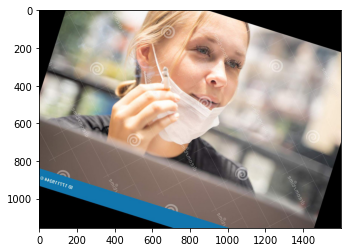

In [5]:
### check images --> plt.imshow
import matplotlib.pyplot as plt

plt.imshow(incorrect_mask[0])
plt.show()

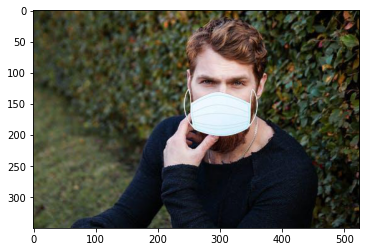

In [6]:
plt.imshow(with_mask[0])
plt.show()

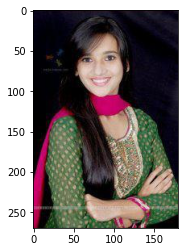

In [7]:
plt.imshow(without_mask[0])
plt.show()

In [8]:
### change type to numpy array
import pandas as pd
import numpy as np

incorrect_mask = np.array(incorrect_mask)
with_mask = np.array(with_mask)
without_mask = np.array(without_mask)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  im

In [9]:
### check dataset shape

print(incorrect_mask.shape, with_mask.shape, without_mask.shape)

(685,) (690,) (686,)


In [10]:
### reduce num of incorrect, with, without mask

incorrect_mask = incorrect_mask[:200]

with_mask = with_mask[:200]

without_mask = without_mask[:200]

In [11]:
### before CNN Best Architecture, preprocessing_1
from skimage.transform import resize

incormk_list = []

for x in range(len(incorrect_mask)):
  resized_img = resize(incorrect_mask[x], (224, 224, 3))

  incormk_list.append(resized_img)


In [12]:
### check incorrect_mask.shape

incorrect_mask = np.array(incormk_list)

print(incorrect_mask.shape)  

(200, 224, 224, 3)


In [13]:
### before CNN Best Architecture, preprocessing_2
from skimage.transform import resize

withmk_list = []

for x in range(len(with_mask)):
  resized_img = resize(with_mask[x], (224, 224, 3))

  withmk_list.append(resized_img)


In [14]:
### check with_mask.shape

with_mask = np.array(withmk_list)

print(with_mask.shape)  

(200, 224, 224, 3)


In [15]:
### before CNN Best Architecture, preprocessing_3
from skimage.transform import resize

withoutmk_list = []

for x in range(len(without_mask)):
  resized_img = resize(without_mask[x], (224, 224, 3))

  withoutmk_list.append(resized_img)


In [16]:
### check without_mask.shape

without_mask = np.array(withoutmk_list)

print(without_mask.shape)  

(200, 224, 224, 3)


In [17]:
### make labels

incorrect_y = [0] * len(incorrect_mask)
with_y = [1] * len(with_mask)
without_y = [2] * len(without_mask)


incorrect_y = np.array(incorrect_y)
with_y = np.array(with_y)
without_y = np.array(without_y)

print(incorrect_y.shape, with_y.shape, without_y.shape)

(200,) (200,) (200,)


In [18]:
### put together --> y
from tensorflow.keras.utils import to_categorical

y_1 = np.append(incorrect_y, with_y, axis = 0)

y = np.append(y_1, without_y, axis = 0)

y = to_categorical(y, 3)

print(len(y))
y

600


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [19]:
### put together --> X

X_1 = np.append(incorrect_mask, with_mask, axis = 0)

X = np.append(X_1, without_mask, axis = 0)

print(len(X))

600


In [20]:
### split X, y by scikit learn --> train, validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 74)

print('X_train shape는' , X_train.shape)
print('X_val shape는' , X_val.shape)
print('y_train shape는' , y_train.shape)
print('y_val shape는' , y_val.shape)

X_train shape는 (420, 224, 224, 3)
X_val shape는 (180, 224, 224, 3)
y_train shape는 (420, 3)
y_val shape는 (180, 3)


## **Modeling_1** : ResNet50


In [21]:
### modeling & compiling by Transfer Learning : ResNet50 with pooling 'avg'
from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import optimizers


model_1 = Sequential()

## load trained ResNet50 model
model_1.add(ResNet50(weights = 'imagenet', include_top = False, pooling = 'avg'))
model_1.add(Dense(3, activation = 'softmax'))

## FREEZE TRAINED LAYER
model_1.layers[0].trainable = False

## compiling 
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [22]:
### model_1 summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
### train model

seed = 74           
np.random.seed(seed)      ## random seed for reproducibility

history_1 = model_1.fit(X_train, y_train, batch_size = 64, epochs = 30, steps_per_epoch = len(X_train) / 64, validation_data = (X_val, y_val))

Epoch 1/30
6/6 [==============================] - 82s 13s/step - loss: 1.2237 - accuracy: 0.3854 - val_loss: 1.1449 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 77s 12s/step - loss: 1.1465 - accuracy: 0.3346 - val_loss: 1.1063 - val_accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 78s 12s/step - loss: 1.0806 - accuracy: 0.3768 - val_loss: 1.0977 - val_accuracy: 0.3389
Epoch 4/30
6/6 [==============================] - 79s 13s/step - loss: 1.0746 - accuracy: 0.3689 - val_loss: 1.0652 - val_accuracy: 0.5000
Epoch 5/30
6/6 [==============================] - 77s 12s/step - loss: 1.0500 - accuracy: 0.4828 - val_loss: 1.0738 - val_accuracy: 0.3278
Epoch 6/30
6/6 [==============================] - 78s 13s/step - loss: 1.0534 - accuracy: 0.4134 - val_loss: 1.0503 - val_accuracy: 0.4500
Epoch 7/30
6/6 [==============================] - 77s 12s/step - loss: 1.0232 - accuracy: 0.5288 - val_loss: 1.0373 - val_accuracy: 0.5611
Epoch 8/30
6/6 [===========

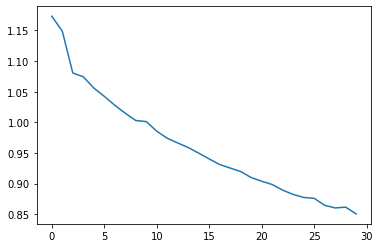

In [24]:
### loss history

plt.plot(history_1.history['loss'])

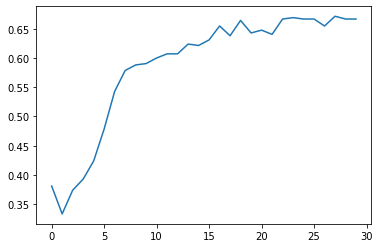

In [25]:
### accuracy history

plt.plot(history_1.history['accuracy'])

In [26]:
### modeling & compiling by Transfer Learning : ResNet50 with pooling 'max'
from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import optimizers


model_1 = Sequential()

## load trained ResNet50 model
model_1.add(ResNet50(weights = 'imagenet', include_top = False, pooling = 'max'))
model_1.add(Dense(3, activation = 'softmax'))

## FREEZE TRAINED LAYER
model_1.layers[0].trainable = False

## compiling 
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [27]:
### model_1 summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
### train model

seed = 74           
np.random.seed(seed)      ## random seed for reproducibility

history_1 = model_1.fit(X_train, y_train, batch_size = 64, epochs = 30, steps_per_epoch = len(X_train) / 64, validation_data = (X_val, y_val))

Epoch 1/30
6/6 [==============================] - 81s 13s/step - loss: 2.3965 - accuracy: 0.3466 - val_loss: 1.5189 - val_accuracy: 0.3500
Epoch 2/30
6/6 [==============================] - 78s 12s/step - loss: 1.2920 - accuracy: 0.3753 - val_loss: 1.2699 - val_accuracy: 0.4056
Epoch 3/30
6/6 [==============================] - 78s 12s/step - loss: 1.1467 - accuracy: 0.3899 - val_loss: 1.0883 - val_accuracy: 0.4444
Epoch 4/30
6/6 [==============================] - 77s 12s/step - loss: 1.0495 - accuracy: 0.4669 - val_loss: 0.9839 - val_accuracy: 0.4722
Epoch 5/30
6/6 [==============================] - 78s 12s/step - loss: 0.9488 - accuracy: 0.5507 - val_loss: 0.9166 - val_accuracy: 0.5556
Epoch 6/30
6/6 [==============================] - 78s 13s/step - loss: 0.8549 - accuracy: 0.6078 - val_loss: 0.8998 - val_accuracy: 0.5944
Epoch 7/30
6/6 [==============================] - 79s 13s/step - loss: 0.8470 - accuracy: 0.6232 - val_loss: 0.8709 - val_accuracy: 0.6056
Epoch 8/30
6/6 [===========

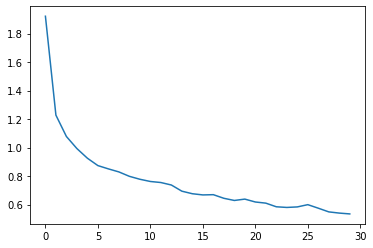

In [29]:
### loss history

plt.plot(history_1.history['loss'])

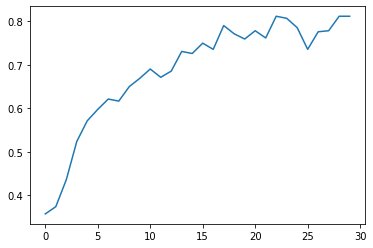

In [30]:
### accuracy history

plt.plot(history_1.history['accuracy'])